In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# PROBLEM STATEMENT
Output variable -> y;

y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")

In [4]:
df1=pd.read_csv('bank-full.csv')

In [5]:
df1.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


# 2 - Data collection and description

In [62]:
df = pd.read_csv("bank-full.csv",sep = ';')

In [63]:
df1 = df.copy()
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


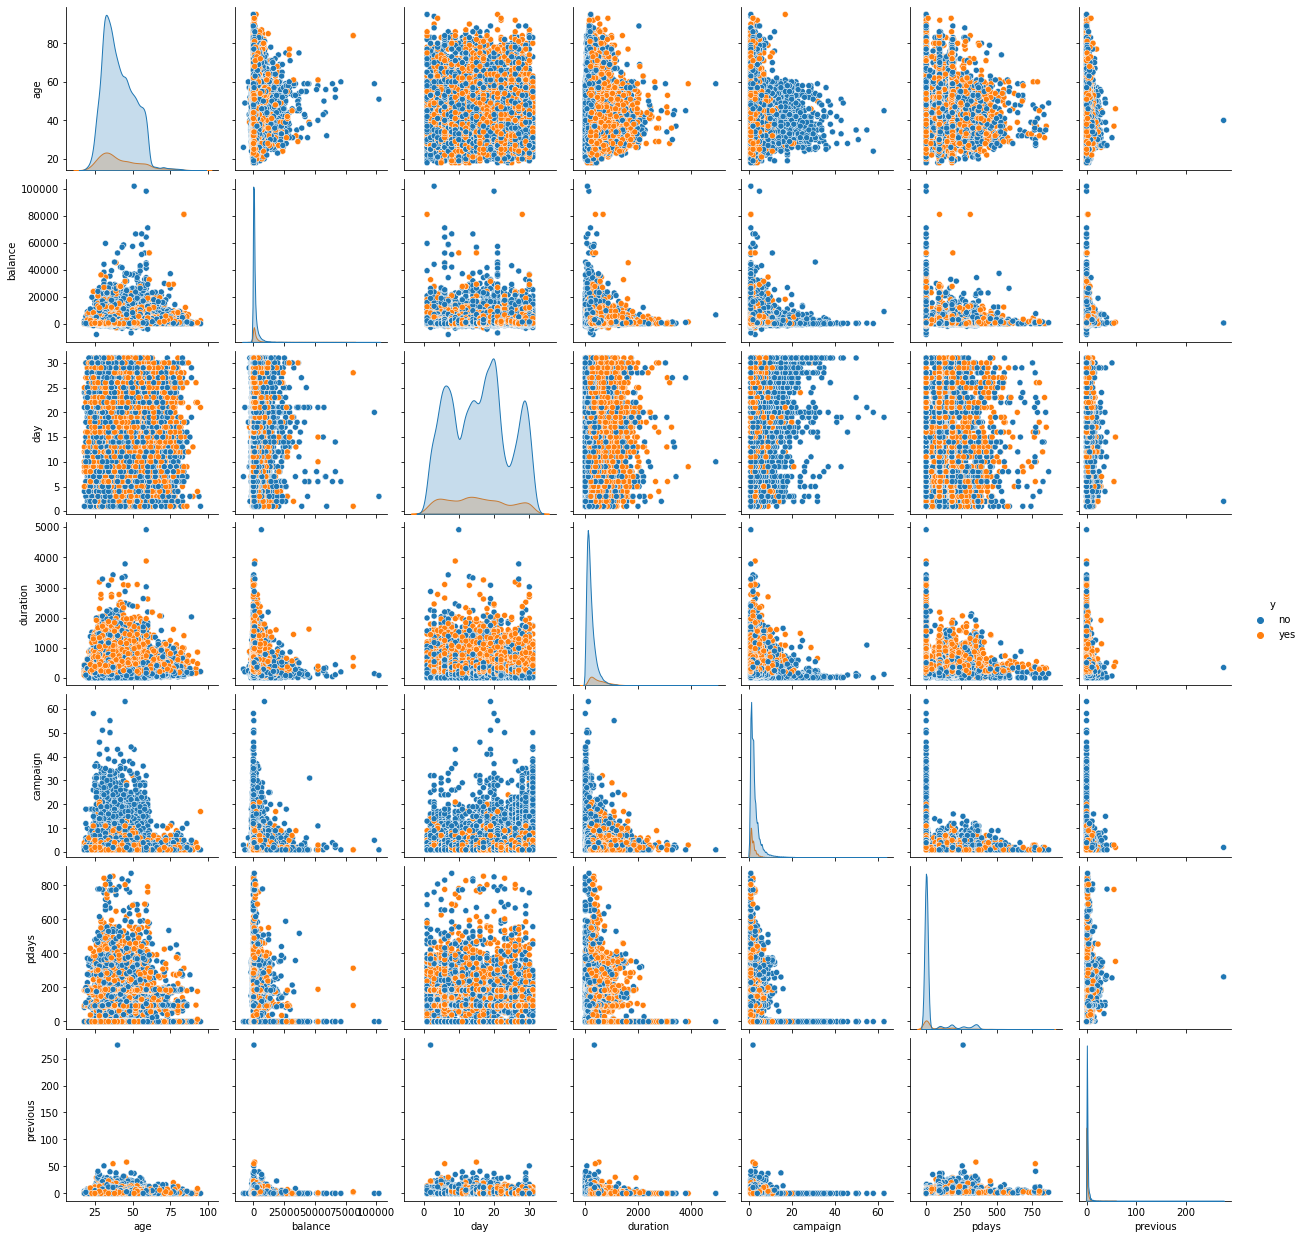

In [9]:
sns.pairplot(df1,hue='y')

In [10]:
df1['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [11]:
count_no_sub = len(df1[df1['y']=="no"])
count_sub = len(df1[df1['y']=="yes"])

In [12]:
(count_sub / (count_sub + count_no_sub))*100  # % of subscription

11.698480458295547

Percentage of Client Subscribed is 11.70 % in the current data set

Text(0, 0.5, 'Frequency of subscribtion')

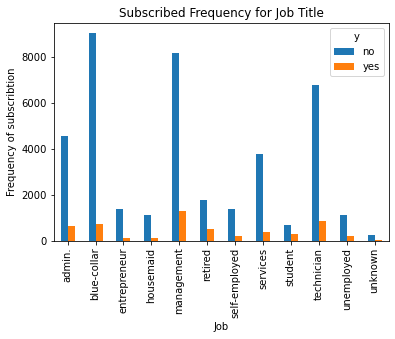

In [13]:
# relation of subscription with jobs
pd.crosstab(df1.job,df1.y).plot(kind='bar')

plt.title('Subscribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of subscribtion')

Text(0, 0.5, 'Proportion of Customers')

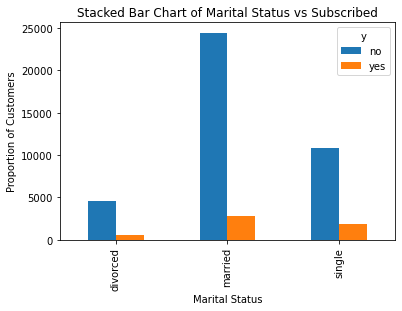

In [14]:
table=pd.crosstab(df1.marital,df1.y).plot(kind='bar')
#table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Maritial Status seems a good parameter to judge the output parameter !

Text(0, 0.5, 'Proportion of Customers')

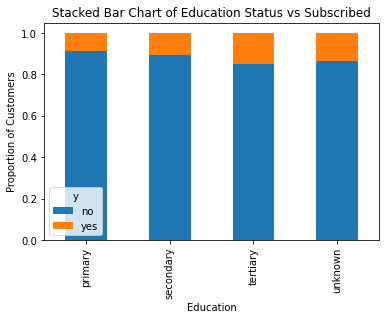

In [15]:
table=pd.crosstab(df1.education,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education Status vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Education not a good parameter to see subscription rate.

Text(0, 0.5, 'Proportion of Customers')

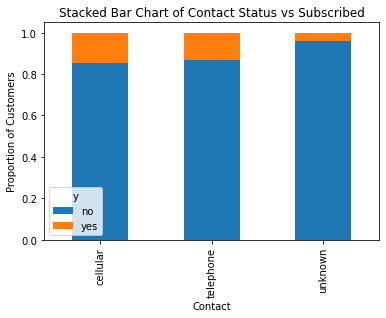

In [16]:
table=pd.crosstab(df1.contact,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Contact Status vs Subscribed')
plt.xlabel('Contact')
plt.ylabel('Proportion of Customers')

Contact not a good parameter to judge subscription

Text(0, 0.5, 'Proportion of Customers')

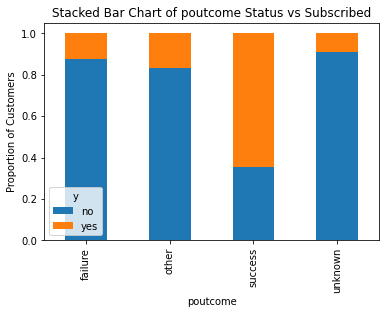

In [17]:
table=pd.crosstab(df1.poutcome,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of poutcome Status vs Subscribed')
plt.xlabel( 'poutcome')
plt.ylabel('Proportion of Customers')

poutcome also affects the output but there are unknown and other 2 factors here.

Text(0, 0.5, 'Frequency')

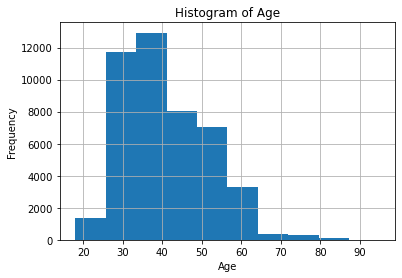

In [18]:
df1.age.hist()
#sns.distplot(df1['age'],)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

its a normally distributed graph where density is higher in agegroup 27 to 40

Text(0, 0.5, 'Frequency of Subscribed')

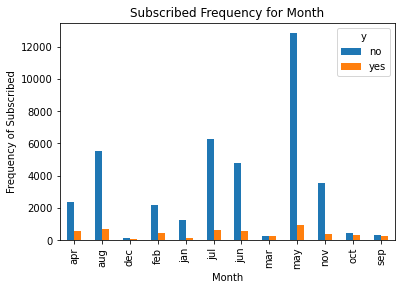

In [19]:
pd.crosstab(df1.month,df1.y).plot(kind='bar')
plt.title('Subscribed Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subscribed')

<AxesSubplot:>

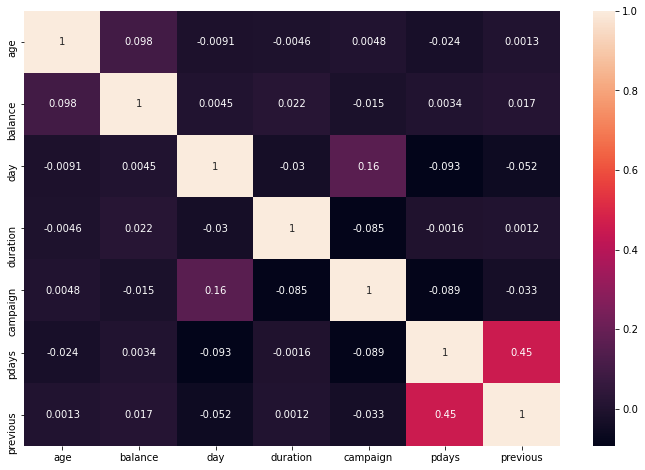

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True)

month also affects the output

In [20]:
df1 ['default'] = df1 ['default'].map({'yes': 1, 'no': 0})
df1 ['housing'] = df1 ['housing'].map({'yes': 1, 'no': 0})
df1 ['loan'] = df1 ['loan'].map({'yes': 1, 'no': 0})
df1 ['y'] = df1 ['y'].map({'yes': 1, 'no': 0})

In [21]:
df1['y'].corr(df1['default'])

-0.022418965890751378

In [22]:
df1['y'].corr(df1['housing'])

-0.13917270249816996

In [23]:
df1['y'].corr(df1['campaign'])

-0.07317200634586693

In [24]:
df1['y'].corr(df1['pdays'])

0.10362149401628722

In [25]:
df1['y'].corr(df1['previous'])

0.0932357727888769

In [26]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [27]:
df2 = pd.get_dummies(df1, columns=["job","marital","poutcome"])
df2.drop('education', axis=1, inplace=True)
df2.drop('default', axis=1, inplace=True)
df2.drop('contact',axis=1, inplace=True)
df2.drop('day',axis=1, inplace=True)

final_test = df2
final_test.head()

,age,balance,housing,loan,month,duration,campaign,pdays,previous,y,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,may,261,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,29,1,0,may,151,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,2,1,1,may,76,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,1506,1,0,may,92,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,33,1,0,0,may,198,1,-1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [28]:
final_test.describe()

,age,balance,housing,loan,duration,campaign,pdays,previous,y,job_admin.,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.116985,0.114375,...,0.168034,0.028820,0.006370,0.115171,0.601933,0.282896,0.108403,0.040698,0.033421,0.817478
std,10.618762,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.321406,0.318269,...,0.373901,0.167303,0.079559,0.319232,0.489505,0.450411,0.310892,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
final_test = pd.get_dummies(final_test, columns=['month'])

In [30]:
final_test

,age,balance,housing,loan,duration,campaign,pdays,previous,y,job_admin.,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,1,0,261,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,1,0,151,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,1,1,76,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,1,0,92,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,0,0,198,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,0,977,3,-1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,0,0,456,2,-1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,0,0,1127,5,184,3,1,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,0,0,508,4,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
final_test.isnull().sum()

age                  0
balance              0
housing              0
loan                 0
duration             0
campaign             0
pdays                0
previous             0
y                    0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_unknown          0
marital_divorced     0
marital_married      0
marital_single       0
poutcome_failure     0
poutcome_other       0
poutcome_success     0
poutcome_unknown     0
month_apr            0
month_aug            0
month_dec            0
month_feb            0
month_jan            0
month_jul            0
month_jun            0
month_mar            0
month_may            0
month_nov            0
month_oct            0
month_sep            0
dtype: int64

<AxesSubplot:>

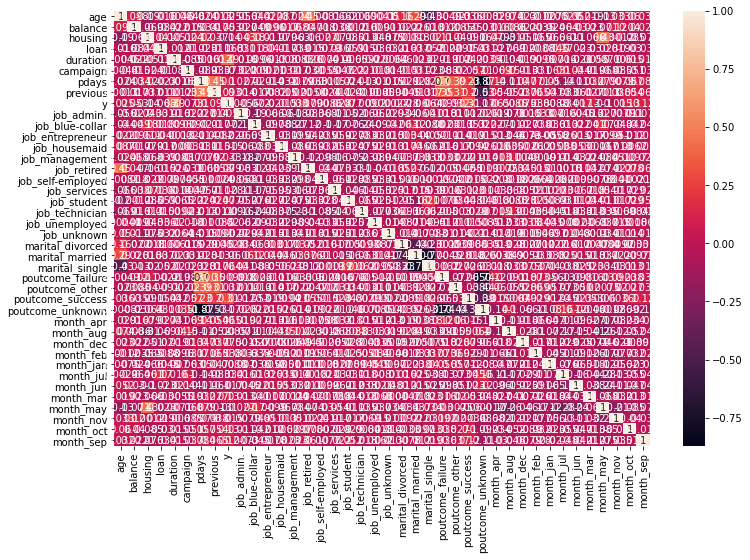

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_test.corr(), annot=True)

In [32]:
final_test.columns

Index(['age', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

# 3. Logistic Regression Model with Scikit Learn

In [33]:
X = final_test.loc[:, final_test.columns != 'y']
y = final_test.loc[:, final_test.columns == 'y']

In [34]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [42]:

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

<ipython-input-60-d8b5b8401979>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    23938.0  3188.0       1.0    27126.0       27126.0
_______________________________________________
Confusion Matrix: 
 [[23938     0]
 [    0  3188]]

Test Result:
Accuracy Score: 90.38%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.926059     0.631848  0.903788      0.778953      0.891879
recall         0.968468     0.411709  0.903788      0.690089      0.903788
f1-score       0.946789     0.498559  0.903788      0.722674      0.894716
support    15984.000000  2101.000000  0.903788  18085.000000  18085.000000

# 5. Performance Measurement

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n {clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [51]:
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.28%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.917945     0.667681  0.902787      0.792813      0.888533
recall         0.977191     0.344103  0.902787      0.660647      0.902787
f1-score       0.946642     0.454150  0.902787      0.700396      0.888762
support    23938.000000  3188.000000  0.902787  27126.000000  27126.000000
_______________________________________________
Confusion Matrix: 
 [[23392   546]
 [ 2091  1097]]

Test Result:
Accuracy Score: 89.98%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.916971     0.632447  0.899806      0.774709      0.883917
recall         0.974912     0.328415  0.899806      0.651664      0.899806
f1-score       0.945054     0.432331  0.899806      0.688693      0.885489
support   

Performance Measurement

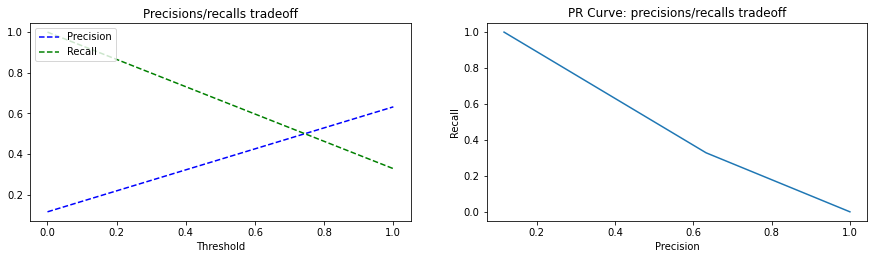

In [53]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

Some tasks may call for higher precision (accuracy of positive predictions). Like designing a classifier that picks up adult contents to protect kids. This will require the classifier to set a high bar to allow any contents to be consumed by children.

Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

# The Receiver Operating Characteristics (ROC) Curve
Instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The false positive rate (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 - specificity.

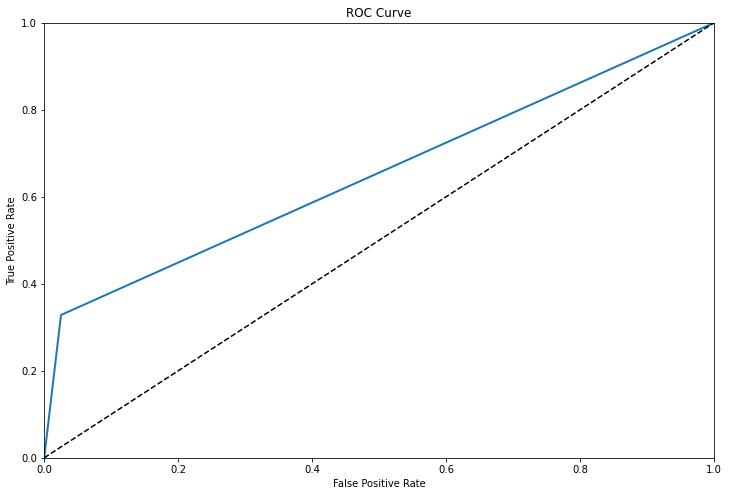

In [55]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();


Use PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives

Use ROC curve whenever the negative class is rare or when you care more about the false negatives than the false positives

In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr_clf.predict(X_test))

0.6516637264346689

# 6. Logistic Regression Hyperparameter tuning

Use PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives

Use ROC curve whenever the negative class is rare or when you care more about the false negatives than the false positives

In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

In [59]:
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

lr_cv = GridSearchCV(estimator=lr_clf, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'C': 0.8, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Result:
Accuracy Score: 90.26%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.917732     0.666870  0.902603      0.792301      0.888250
recall         0.977233     0.342221  0.902603      0.659727      0.902603
f1-score       0.946549     0.452322  0.902603      0.699435      0.888464
support    23938.000000  3188.000000  0.902603  27126.000000  27126.000000
_______________________________________________
Confusion Matrix: 
 [[23393   545]
 [ 2097  1091]]

Test Result:
Accuracy Score: 89.96%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.917005     0.630474  0.899641      0.773740      0.883718
recall         0.974662     0.328891  0.899641      0.651777      0.899641
f1-score       0.944955     0.432280  0.899641      0.688618      0.885396
support   